As part of your duties as senior data scientist for the famous ThomasTrain company, you are assigned to understand the satisfaction of the customers even without a direct evaluation. 
To accomplish this task, the company provided you with the “trains_dataset.csv”.
 Understanding the customers’ satisfaction will help the marketing team to effectively target users with promotions and making the retention higher.


Assignment:
- Perform an Explanatory data analysis (EDA) with visualization;
- Generate a training and test set. The test set should be used only at the end;
- Preprocess the dataset (remove outliers, impute missing values, encode categorical features with one hot encoding, not necessarily in this order). Your goal is to estimate whether a customer is satisfied;
- Define whether this is a regression, classification or clustering problem, explain why and choose your model design accordingly. Test at least 3 different models. First, create a validation set from the training set to analyze the behaviour with the default hyperparameters. Then use cross-validation to find the best set of hyperparameters. You must describe every hyperparameter tuned (the more, the better);
- Select the best architecture using the right metric;
- Finally, compute the performances of the test set.


# Importing libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import numpy as np

# Reading the input file

In [56]:
df_trains = pd.read_csv('trains.csv')

# EDA

EDA stands for Exploratory Data Analysis. It's an initial phase in the data analysis process where you explore and summarize key characteristics, patterns, and relationships in a dataset. The primary goal of EDA is to understand the data, gain insights, and prepare for further analysis or modeling.

# 1) Understanding the dataset

### 1.1) General overview of the dataset

Using the function *.head()*, we can extract from the dataset the first x columns (x=5 by default, but we can change this number). They are not useful for analytic purposes, but still enable us to visualize the dataset.

In [57]:
df_trains.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


### 1.2) Showing the dimension of the dataset

The dataset has 129880 rows and 25 columns

In [58]:
print(f"The number of rows is {df_trains.shape[0]} and the number of columns is {df_trains.shape[1]}")

The number of rows is 129880 and the number of columns is 25


### 1.3) Gathering information from data

The visulaization *.info()* let us notice that almost every column has complete informations (hence, 0 null values), only 'Arrival delay in Minutes' column has some missing values.

Moreover we can see that among 25 variables, only 6 are categorical, while 19 are numerical.

In [59]:
df_trains.info() # outputs column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Legroom Service Rating         129880 non-null  int64  
 1   Onboard General Rating         129880 non-null  int64  
 2   Food'n'Drink Rating            129880 non-null  int64  
 3   Age                            129880 non-null  int64  
 4   Departure Arrival Time Rating  129880 non-null  int64  
 5   Onboard WiFi Rating            129880 non-null  int64  
 6   Ticket ID                      129880 non-null  int64  
 7   Checkin Rating                 129880 non-null  int64  
 8   Track Location Rating          129880 non-null  int64  
 9   Baggage Handling Rating        129880 non-null  int64  
 10  Arrival Delay in Minutes       129487 non-null  float64
 11  Ticket Class                   129880 non-null  object 
 12  Loyalty                       

In [60]:
df_trains.nunique() # outputs number of unique values in each column

Legroom Service Rating                6
Onboard General Rating                6
Food'n'Drink Rating                   6
Age                                  75
Departure Arrival Time Rating         6
Onboard WiFi Rating                   6
Ticket ID                        129880
Checkin Rating                        6
Track Location Rating                 6
Baggage Handling Rating               5
Arrival Delay in Minutes            472
Ticket Class                          3
Loyalty                               2
Gender                                2
Boarding Rating                       6
Online Booking Rating                 6
Satisfied                             2
Onboard Entertainment Rating          6
Date and Time                     22667
Distance                           3821
Seat Comfort Rating                   6
Work or Leisure                       2
Departure Delay in Minutes          466
Onboard Service Rating                6
Cleanliness Rating                    6


### 1.4) Handling missing values

Even though it seems like a data cleaning task, our approach in EDA involves addressing missing values to facilitate data plotting and enhance visualization. Specifically, our method for handling missing values involves replacing them with the mode.

Our aim is to retain maximum information for model accuracy, avoiding deletion of rows or columns. This approach ensures a more comprehensive dataset, supporting the development of a more precise model.

In [61]:
# Check for missing values

missing_values = df_trains.isnull().sum()
missing_values

Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64

In particular, from this visualization, we notice that 'Arrival Delay in minutes' column has 393 missing values.

In [62]:
for column in df_trains.columns:
    df_trains[column].fillna(df_trains[column].mode()[0], inplace=True)
df_trains.isnull().sum()

Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64

We used a single *for* loop, that iterates over the columns of the dataframe and replaces the missing rows of each column with its mode. Using the command *.isnull().sum()*, we notice that there are no longer columns containing missing values.

### 1.5) Relevant features of numeric variables

Using the *.describe()* function offers a comprehensive overview of key statistics for each numerical variable. This includes essential metrics like mean, standard deviation, quartiles, as well as minimum and maximum values, providing insights into the distribution and central tendency of the data.

In [63]:
# Explore basic statistics

summary_stats = df_trains.describe()
summary_stats.T

,count,mean,std,min,25%,50%,75%,max
Legroom Service Rating,129880.0,3.350878e+00,1.316252e+00,0.0,2.00,4.0,4.00,5.0
Onboard General Rating,129880.0,3.642193e+00,1.176669e+00,0.0,3.00,4.0,5.00,5.0
Food'n'Drink Rating,129880.0,3.204774e+00,1.329933e+00,0.0,2.00,3.0,4.00,5.0
Age,129880.0,3.942796e+01,1.511936e+01,7.0,27.00,40.0,51.00,85.0
Departure Arrival Time Rating,129880.0,3.057599e+00,1.526741e+00,0.0,2.00,3.0,4.00,5.0
Onboard WiFi Rating,129880.0,2.728696e+00,1.329340e+00,0.0,2.00,3.0,4.00,5.0
Ticket ID,129880.0,5.494025e+06,2.596965e+06,1000025.0,3239217.75,5495646.5,7739714.75,9999975.0
Checkin Rating,129880.0,3.306267e+00,1.266185e+00,0.0,3.00,3.0,4.00,5.0
Track Location Rating,129880.0,2.976925e+00,1.278520e+00,0.0,2.00,3.0,4.00,5.0
Baggage Handling Rating,129880.0,3.632114e+00,1.180025e+00,1.0,3.00,4.0,5.00,5.0


This overview allows us to emphasize certain observations. Within these, we discovered that:
- Most ratings tend to cluster around the middle values (around 3 to 4), suggesting a moderate to satisfactory experience in these aspects;
- The age distribution spans from 7 to 85 years and the average age is approximately 39 years, with a standard deviation of around 15 years. The majority of travelers fall between 27 to 51 years old, covering the interquartile range (25th to 75th percentile).;
- The standard deviations for most ratings are noticeable (ranging between 1.18 to 1.53), indicating some variability in passengers' experiences. This variability implies differing opinions or experiences among passengers, leading to a spread in ratings.
- The "Arrival delay in minutes" and "Departrure delay in minutes" have at least 75% of values that are equal to 0. In spite of this, the average is relatively high (15) because of the presence of noisy outliers.

In summary, the dataset reflects a range of customer experiences across different service aspects, with generally moderate to satisfactory ratings, some variability in opinions, and a diverse age group of travelers. There don't seem to be extreme outliers in the provided statistics, suggesting a generally consistent range of ratings and ages without significant anomalies.

### 1.6) Insights on categorical variables

In [64]:
# Assuming 'df' is your DataFrame
categorical_count = df_trains.select_dtypes(include='object').shape[1]
print(f"Number of categorical features: {categorical_count}")

Number of categorical features: 6


Through the function *.info()* we found out that among the 25 variabes, 6 of them were categorical.
The latter are the following: 
- Ticket class
- Loyalty
- Gender
- Date and time
- Satisfied
- Work or leisure


### Insights of *Ticket class*

In [65]:
df_trains['Ticket Class'].value_counts() # how many times each unique ticket class appears

Premium    62160
Economy    58309
Smart       9411
Name: Ticket Class, dtype: int64

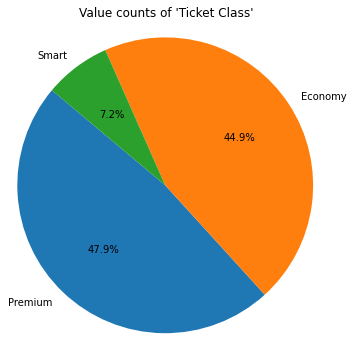

In [66]:
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
ticket_class_counts = df_trains['Ticket Class'].value_counts()

plt.pie(ticket_class_counts, labels=ticket_class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Value counts of 'Ticket Class'")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Even though 'Premium' and 'Economy' are really balanced, the 'Smart' option is significantly less choosen.

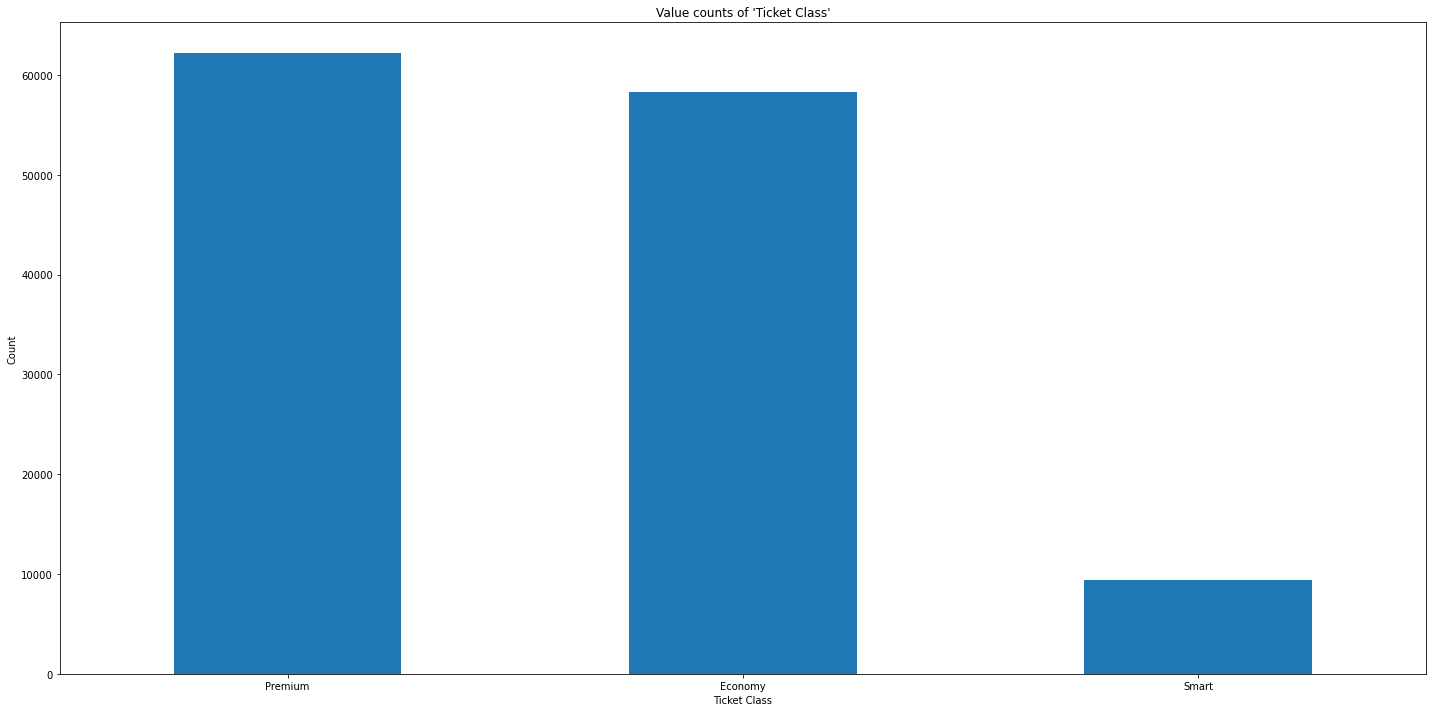

In [67]:
plt.figure(figsize=(20,10))
df_trains['Ticket Class'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Ticket Class'")
plt.xlabel("Ticket Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Insights of *Loyalty*

In [68]:
df_trains['Loyalty'].value_counts() 

Loyal       106100
Disloyal     23780
Name: Loyalty, dtype: int64

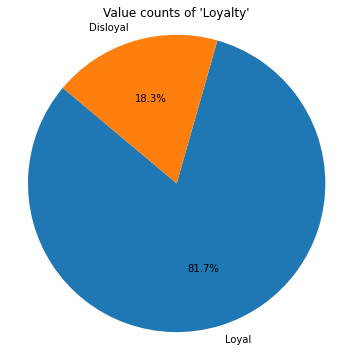

In [69]:
plt.figure(figsize=(5,5))  # Adjust the figure size as needed
loyalty_counts = df_trains['Loyalty'].value_counts()

plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Value counts of 'Loyalty'")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

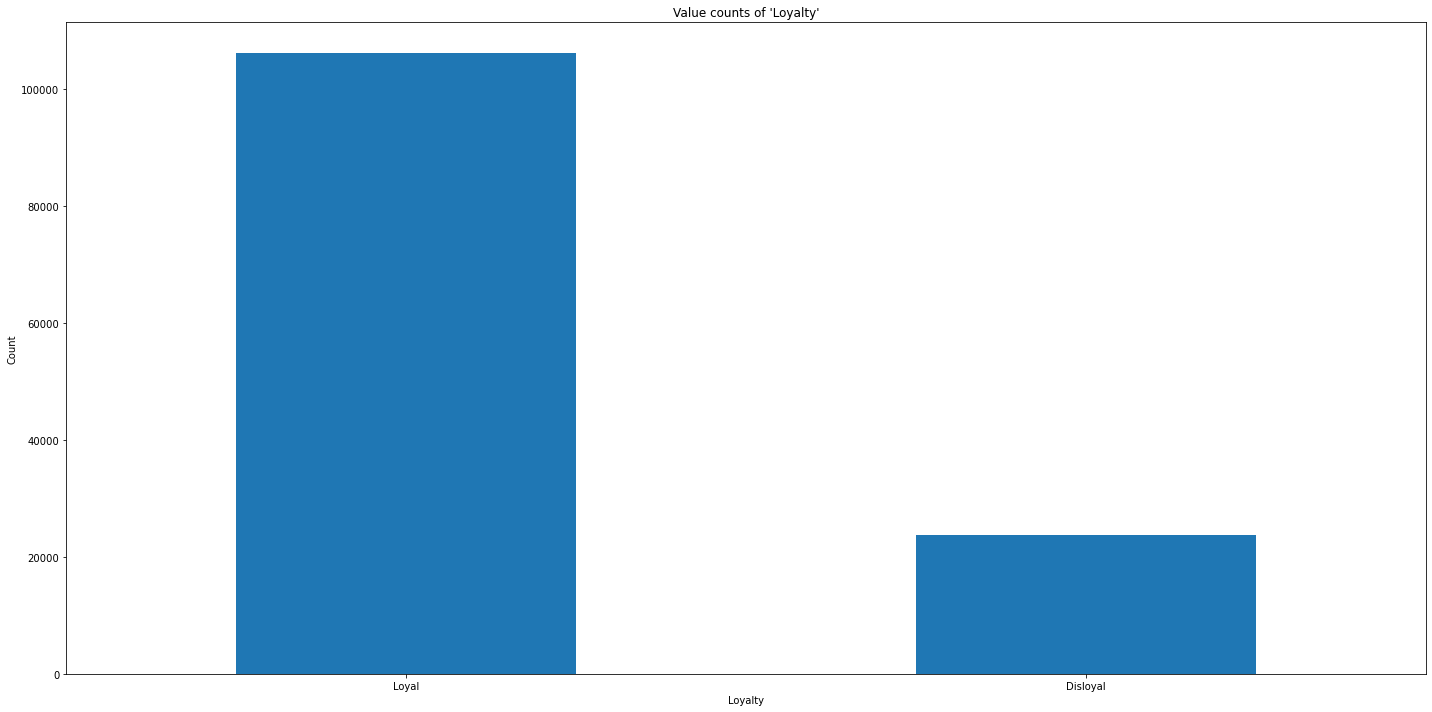

In [70]:
plt.figure(figsize=(20,10))
df_trains['Loyalty'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Loyalty'")
plt.xlabel("Loyalty")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

From this point of view the dataset is realli unbalanced since the 'Loyal' count is about 4 times higher than the 'Disloyal' one.

### Insights of *Gender*

In [71]:
df_trains['Gender'].value_counts()

F    65899
M    63981
Name: Gender, dtype: int64

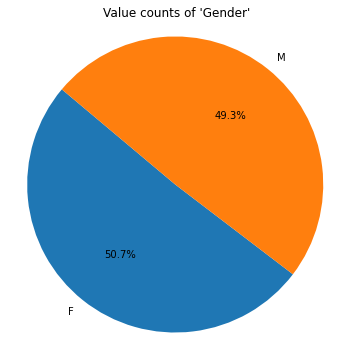

In [72]:
plt.figure(figsize=(5,5))  # Adjust the figure size as needed
gender_counts = df_trains['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Value counts of 'Gender'")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

The amount of passengers taken into account in this dataset is really balanced when delaing with the gender point of view.

### Insights of *Date and time*

In [73]:
df_trains['Date and Time'].value_counts() 

2016-02-26 13:24    17
2016-02-22 09:35    17
2016-02-24 03:40    17
2016-02-16 00:09    16
2016-02-17 08:26    16
                    ..
2016-03-01 02:49     1
2016-02-24 02:32     1
2016-02-15 13:05     1
2016-02-22 05:11     1
2016-02-27 23:48     1
Name: Date and Time, Length: 22667, dtype: int64

The variable "Date and Time" presents a really varied distribution, with a lot of different values. In addittion, we can assume that the date and time of the trains are not relevant for the satisfaction of the customer. However, we will consider this aspect in the correlation matrix.

Insights of *Satisfied* (target variable)

In [74]:
df_trains['Satisfied'].value_counts() 

N    73452
Y    56428
Name: Satisfied, dtype: int64

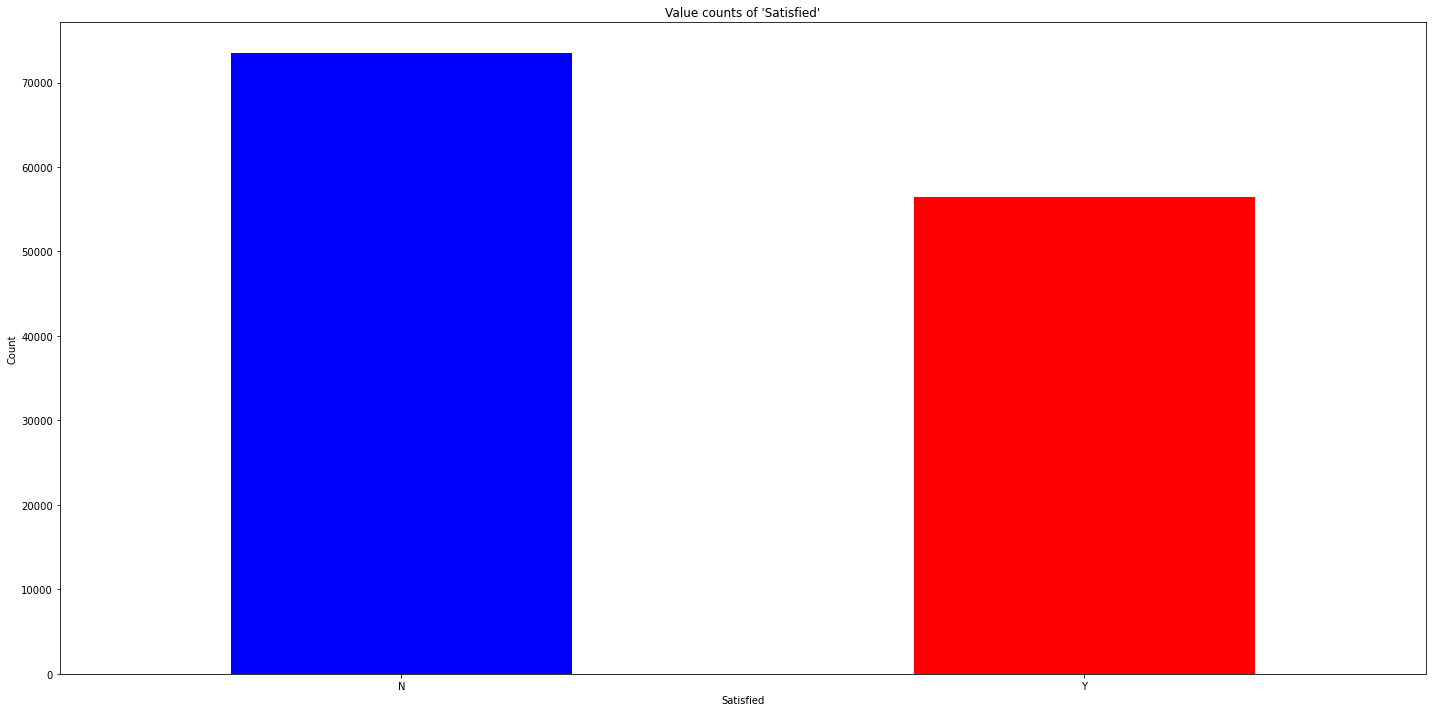

In [75]:
# Assuming there are two categories: 'Satisfied' and 'Unsatisfied'

colors = ['blue', 'red']  # Define the colors for each category

plt.figure(figsize=(20, 10))
counts = df_trains['Satisfied'].value_counts()
counts.plot(kind="bar", color=[colors[i] for i in range(len(counts))])

plt.title("Value counts of 'Satisfied'")
plt.xlabel("Satisfied")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


There are more 'No' than 'Yes' answering the satisfaction of the clients.

Furthermore, we know from the beginning of our EDA that our target column has not Null values.

### Insights of *Work or leisure*

In [76]:
df_trains['Work or Leisure'].value_counts() 

work       89693
leisure    40187
Name: Work or Leisure, dtype: int64

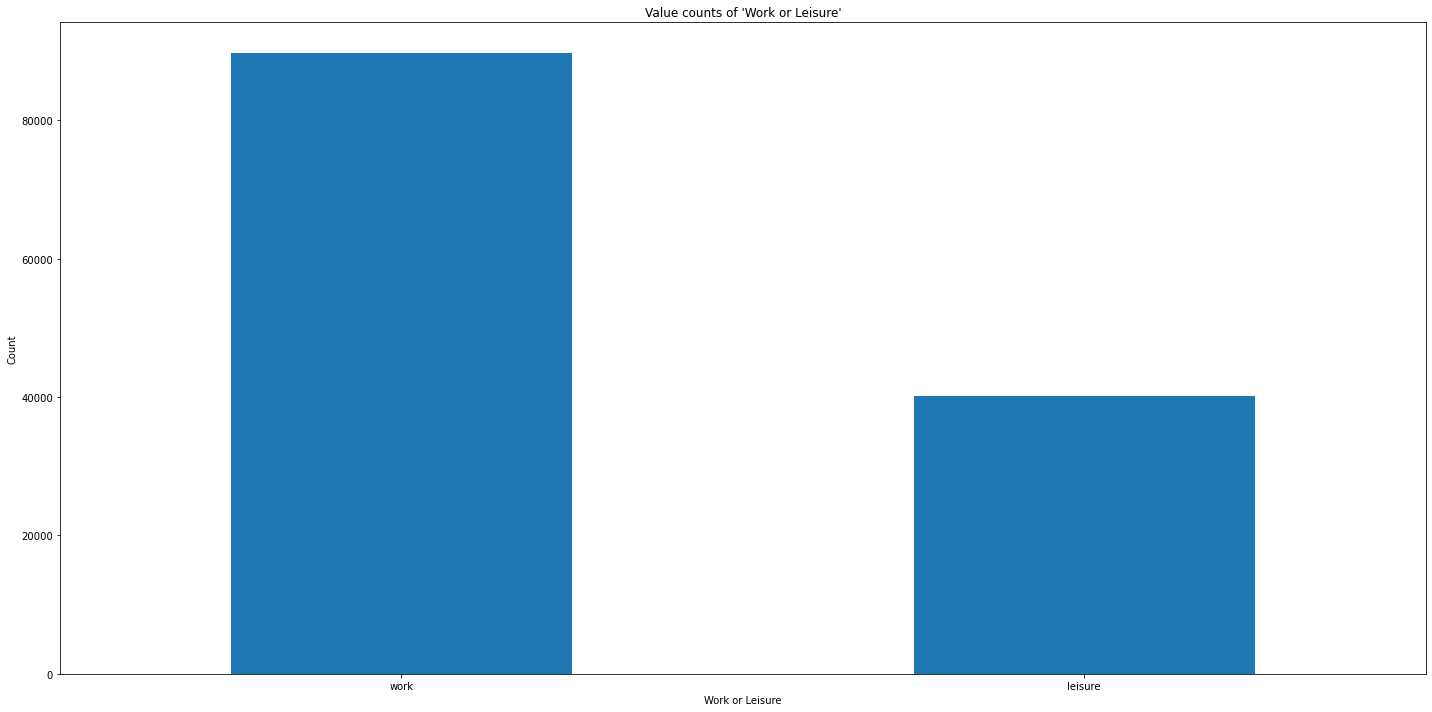

In [77]:
plt.figure(figsize=(20,10))
df_trains['Work or Leisure'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Work or Leisure'")
plt.xlabel("Work or Leisure")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

'work' is the most frequent answer.

### 1.7) Insights on numerical variables

Since we're focusing on numerical variables, it is possible to compute correlation. In order to achieve such goal we will use the *.corr()* function. 

We are interested in generating a plot for each numerical variable. Recall that the dataset consists of 19 numerical variables, hence, we get to 19 numerical variables of interest. The idea is to generate 17 subplots.

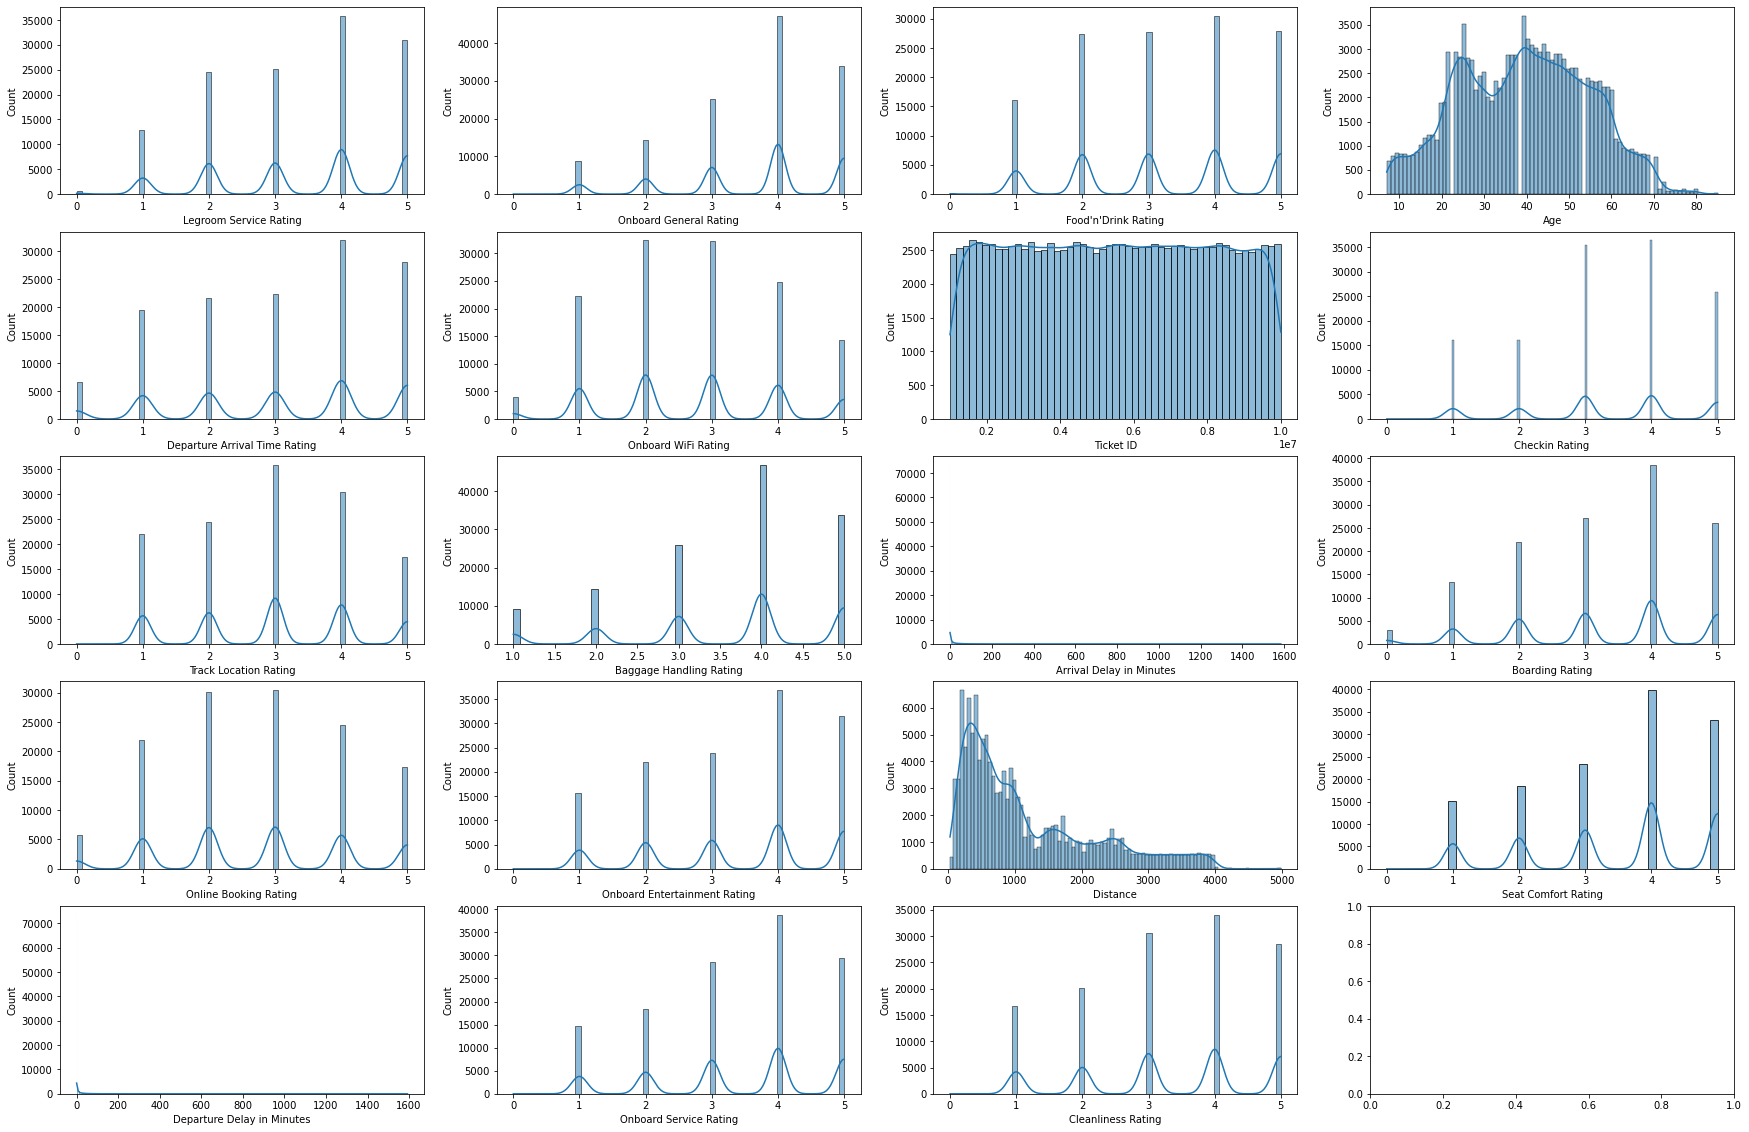

In [78]:
fig, axes = plt.subplots(5,4, figsize=(30,20))
numerical_columns = df_trains.select_dtypes(include='number').columns
for a in range(0,5):
    for b in range(0,4):
        if len(numerical_columns)==0:
            break
        sns.histplot(ax=axes[a, b], data=df_trains, x=numerical_columns[0], kde=True)
        numerical_columns = numerical_columns[1:]
    if len(numerical_columns)==0:
        break

In general the features have a similar distribution, with custoemrs being generally satisfied with the service. However, the most important feature to obsereve is the distribution of the 'Arrival Delay in Minutes' feature. We can see that the distribution is skewed to the right, with a long tail. This means that there are a few outliers that are very far from the mean. This is a problem because it means that the model will be trained on a few outliers, which will make it perform poorly on the majority of the data. We will deal with this problem in the next section.

In order visualize the histogram of one variable only, pass its name as parameter of the following function.

In [79]:
def histogram(var_name):
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_trains, x=var_name, kde=True)
    plt.title("Histogram of " + var_name)

#example
#histogram('Legroom Service Rating')

### 1.8) Data Reduction

We remove *'Ticket ID'* and *'Date and Time'* features, assuming they don’t have any predictive power to predict the dependent variable

In [80]:
# Remove "Ticket ID" and "Date and Time" columns from the dataset

df_trains = df_trains.drop(['Ticket ID', 'Date and Time'], axis = 1)

### 1.9) Inspecting for Outliers

- As a first step, we can visualize outliers plotting boxplots in order to have a general idea on what is going on.
- Outliers are relevant to build our model since they can negatively affect the performance.

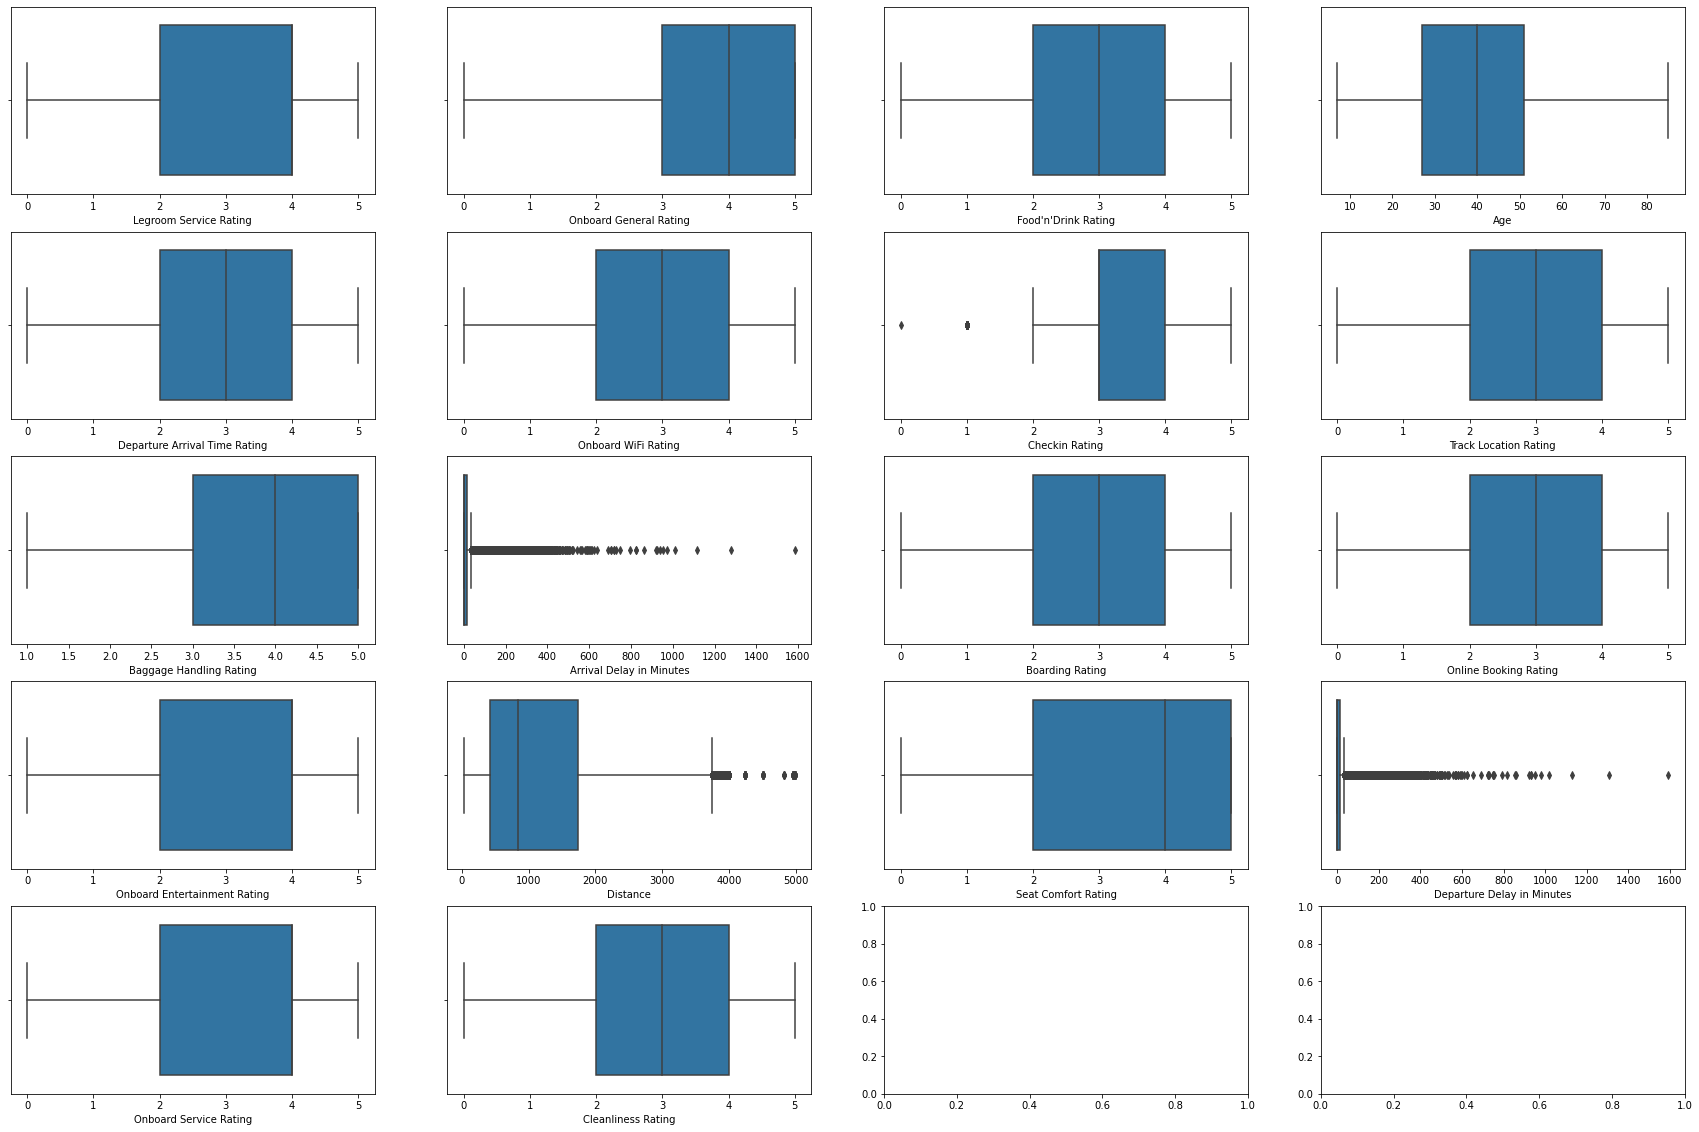

In [81]:
fig, axes = plt.subplots(5,4, figsize=(30,20))
numerical_columns = df_trains.select_dtypes(include='number').columns
for a in range(0,5):
    for b in range(0,4):
        if len(numerical_columns)==0:
            break
        sns.boxplot(ax=axes[a, b], data=df_trains, x=numerical_columns[0])
        numerical_columns = numerical_columns[1:]
    if len(numerical_columns)==0:
        break

The boxplots confirmed the ides that the feautures "Departure Delay in Minutes" and "Arrival Delay in Minutes" are heavily affected by outliers.

# 2) Preprocessing

Preprocessing phase is one of the most important ones when creating machine learning models. It usually consists of the following stages:

1. Handling missing values
2. Inspecting for redundancy
3. Column cleanup
4. Removing outliers

### 2.1) Handling missing values

We have already covered point 1 in the previous scetion (EDA). In particular, we have replaced all the missing rows of each attribute with its mode. 

### 2.2) Inspecting for redundancy

### Which are the most correlated features?

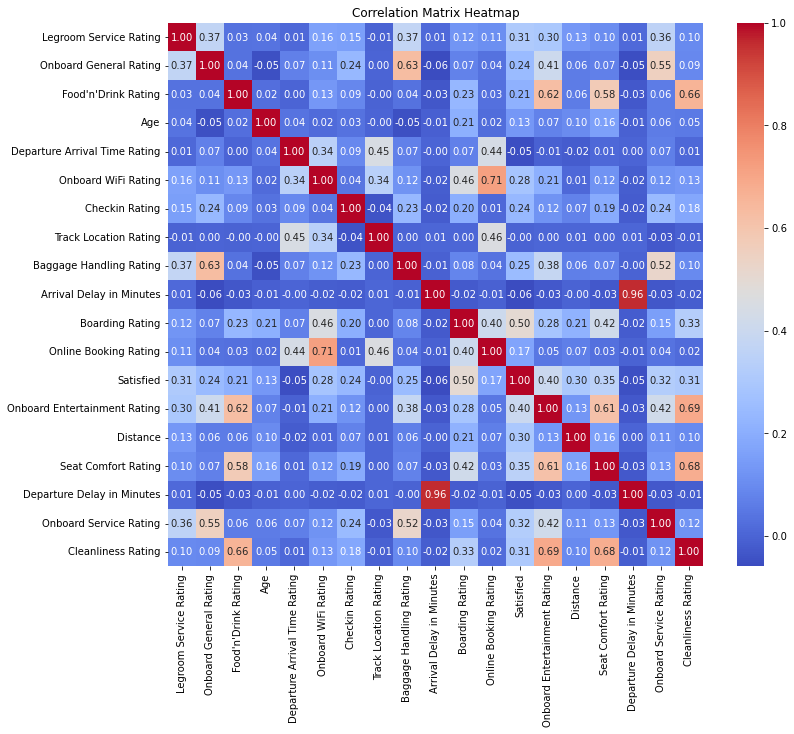

Boarding Rating                  0.501749
Onboard Entertainment Rating     0.398234
Seat Comfort Rating              0.348829
Onboard Service Rating           0.322205
Legroom Service Rating           0.312424
Cleanliness Rating               0.307035
Distance                         0.298085
Onboard WiFi Rating              0.283460
Baggage Handling Rating          0.248680
Onboard General Rating           0.244918
Checkin Rating                   0.237252
Food'n'Drink Rating              0.211340
Online Booking Rating            0.168877
Age                              0.134091
Track Location Rating           -0.002793
Departure Delay in Minutes      -0.050740
Departure Arrival Time Rating   -0.054270
Arrival Delay in Minutes        -0.058145
Name: Satisfied, dtype: float64

In [82]:
df_trains_copy = df_trains.copy()

df_trains_copy['Satisfied'] = df_trains_copy['Satisfied'].map({'Y': 1, 'N': 0}) # Converting 'Satisfied' to a numerical value for correlation analysis
numeric_cols = df_trains_copy.select_dtypes(include=[np.number]).columns
df_trains_numeric = df_trains_copy[numeric_cols]

correlation_matrix = df_trains_numeric.corr() # Compute the correlation matrix

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Analyze correlations with target variable 'Satisfied'
correlations_with_target = correlation_matrix['Satisfied'].sort_values(ascending=False)
correlations_with_target.drop('Satisfied', inplace=True)  # Don't want to see the correlation of 'Satisfied' with itself
correlations_with_target


Since there are many features that are not really correlated with the target variable, we can drop them, since they are not relevant to train the model. In particular, we will drop all the features that have a correlation with the target variable in absolute value than 0.2.

In [83]:
# Define the correlation threshold
threshold = 0.15

# Create a mask to identify highly correlated columns
high_corr_columns = correlation_matrix.loc[:, "Satisfied"]
high_corr_columns = high_corr_columns[high_corr_columns < threshold].index.tolist()

# Find column names to drop
columns_to_drop = [col for col in high_corr_columns]
print(f"Columns to dropped: {columns_to_drop}")

# Drop the identified columns from the DataFrame
df_trains_filtered = df_trains.drop(columns=columns_to_drop)

# Check the resulting DataFrame after dropping highly correlated columns

print(f"Original DataFrame: {df_trains.shape}")
print(f"Filtered DataFrame: {df_trains_filtered.shape}")
df_trains_filtered.head()


Columns to dropped: ['Age', 'Departure Arrival Time Rating', 'Track Location Rating', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']
Original DataFrame: (129880, 23)
Filtered DataFrame: (129880, 18)


,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Onboard WiFi Rating,Checkin Rating,Baggage Handling Rating,Ticket Class,Loyalty,Gender,Boarding Rating,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Work or Leisure,Onboard Service Rating,Cleanliness Rating
0,3,5,5,3,4,4,Smart,Loyal,M,3,3,N,5,460,5,leisure,4,5
1,5,4,1,3,1,3,Premium,Disloyal,M,3,3,N,1,235,1,work,1,1
2,3,4,5,2,4,4,Premium,Loyal,F,5,2,Y,5,1142,5,work,4,5
3,5,4,2,2,1,3,Premium,Loyal,F,2,5,N,2,562,2,work,2,2
4,4,3,4,3,3,4,Premium,Loyal,M,5,3,Y,3,214,5,work,3,3


As we can see, the features dropped are the ones that we expected to be not relevant for the model. For instance, Ticket ID is just an identifier for each ticket. In addittion, it is not relevant to know the date and time of the train for the satisfaction of the customer as long as its age. A surprising result is the lower correlation of the 'Arrival Delay in Minutes' feature. This is maybe due to the fact that the presence of few outliers does not highly affect the correlation (since they are few).

In [84]:
from sklearn.compose import make_column_selector as selector

categorical_columns = df_trains_copy.select_dtypes(include='object').columns

print('categorical columns: ',(categorical_columns.tolist()))

categorical columns:  ['Ticket Class', 'Loyalty', 'Gender', 'Work or Leisure']


### 2.3) Column cleanup

We convert all columns' manes into lowercase, for simpicity.

In [85]:
df_trains_filtered.columns = [col.lower() for col in df_trains_filtered.columns]
print(df_trains_filtered.columns)

Index(['legroom service rating', 'onboard general rating',
       'food'n'drink rating', 'onboard wifi rating', 'checkin rating',
       'baggage handling rating', 'ticket class', 'loyalty', 'gender',
       'boarding rating', 'online booking rating', 'satisfied',
       'onboard entertainment rating', 'distance', 'seat comfort rating',
       'work or leisure', 'onboard service rating', 'cleanliness rating'],
      dtype='object')


### 3.3) StandardScaler and OneHotEncoder

Both StandardScaler and OneHotEncoder are preprocessing techniques used in machine learning to prepare data for modeling. They serve different purposes:

- StandardScaler is used for standardizing numerical features by scaling them to have mean 0 and variance 1;
- OneHotEncoder is used for converting categorical variables into a binary matrix format.

In [87]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OrdinalEncoder

le = LabelEncoder()

encoded_data = le.fit_transform(df_trains_filtered['ticket class'])
print(type(encoded_data))

unique_values, counts = np.unique(encoded_data, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

print(df_trains_filtered['ticket class'].value_counts())


#df_trains_filtered['ticket class'] = encoded_data
df_trains_filtered['loyalty'] = LabelEncoder().fit_transform(df_trains_filtered['loyalty'])
df_trains_filtered['gender'] = LabelEncoder().fit_transform(df_trains_filtered['gender'])
df_trains_filtered['satisfied'] = LabelEncoder().fit_transform(df_trains_filtered['satisfied'])
#df_trains_filtered['date and time'] = LabelEncoder().fit_transform(df_trains_filtered['date and time'])
df_trains_filtered['work or leisure'] = LabelEncoder().fit_transform(df_trains_filtered['work or leisure'])

df_trains_filtered.head()

<class 'numpy.ndarray'>
Value: 0, Count: 58309
Value: 1, Count: 62160
Value: 2, Count: 9411
1    62160
0    58309
2     9411
Name: ticket class, dtype: int64


,legroom service rating,onboard general rating,food'n'drink rating,onboard wifi rating,checkin rating,baggage handling rating,ticket class,loyalty,gender,boarding rating,online booking rating,satisfied,onboard entertainment rating,distance,seat comfort rating,work or leisure,onboard service rating,cleanliness rating
0,3,5,5,3,4,4,2,1,1,3,3,0,5,460,5,0,4,5
1,5,4,1,3,1,3,1,0,1,3,3,0,1,235,1,1,1,1
2,3,4,5,2,4,4,1,1,0,5,2,1,5,1142,5,1,4,5
3,5,4,2,2,1,3,1,1,0,2,5,0,2,562,2,1,2,2
4,4,3,4,3,3,4,1,1,1,5,3,1,3,214,5,1,3,3


Now, we look for categorical variables with a low correlation with the target variable "Satisfied". We will drop them, since they are not relevant for the model, using the same threshold as before (0.2).

['ticket class', 'loyalty', 'gender', 'work or leisure', 'satisfied']


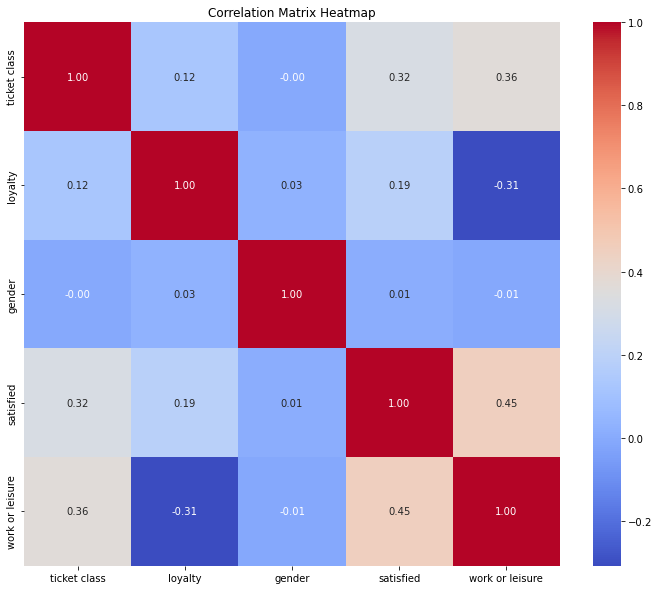

Columns to dropped: ['gender']
Original DataFrame: (129880, 23)
Filtered DataFrame: (129880, 17)


,legroom service rating,onboard general rating,food'n'drink rating,onboard wifi rating,checkin rating,baggage handling rating,ticket class,loyalty,boarding rating,online booking rating,satisfied,onboard entertainment rating,distance,seat comfort rating,work or leisure,onboard service rating,cleanliness rating
0,3,5,5,3,4,4,2,1,3,3,0,5,460,5,0,4,5
1,5,4,1,3,1,3,1,0,3,3,0,1,235,1,1,1,1
2,3,4,5,2,4,4,1,1,5,2,1,5,1142,5,1,4,5
3,5,4,2,2,1,3,1,1,2,5,0,2,562,2,1,2,2
4,4,3,4,3,3,4,1,1,5,3,1,3,214,5,1,3,3


In [88]:
categorical_columns = [col.lower() for col in categorical_columns]
categorical_columns.append('satisfied')
print(categorical_columns)
df_trains_categorical = df_trains_filtered.copy()
for column in df_trains_filtered.columns:
    if column not in categorical_columns:
               df_trains_categorical.drop(columns=column, inplace=True)

correlation_matrix = df_trains_categorical.corr() # Compute the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

high_corr_columns = correlation_matrix.loc[:, "satisfied"]
high_corr_columns = high_corr_columns[high_corr_columns < threshold].index.tolist()

# Find column names to drop
columns_to_drop = [col for col in high_corr_columns]
print(f"Columns to dropped: {columns_to_drop}")

# Drop the identified columns from the DataFrame
df_trains_filtered = df_trains_filtered.drop(columns=columns_to_drop)

# Check the resulting DataFrame after dropping highly correlated columns

print(f"Original DataFrame: {df_trains.shape}")
print(f"Filtered DataFrame: {df_trains_filtered.shape}")
df_trains_filtered.head()

In [89]:
df_trains_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
legroom service rating,129880.0,3.350878,1.316252,0.0,2.0,4.0,4.0,5.0
onboard general rating,129880.0,3.642193,1.176669,0.0,3.0,4.0,5.0,5.0
food'n'drink rating,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
onboard wifi rating,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
checkin rating,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
baggage handling rating,129880.0,3.632114,1.180025,1.0,3.0,4.0,5.0,5.0
ticket class,129880.0,0.623514,0.616170,0.0,0.0,1.0,1.0,2.0
loyalty,129880.0,0.816908,0.386743,0.0,1.0,1.0,1.0,1.0
boarding rating,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
online booking rating,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0


### 2.4) Removing outliers

### - Two-steps approach to remove outliers

In [90]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25) #first quantile
    Q3 = df[ft].quantile(0.75) #second quantile
    IQR = Q3 - Q1 #interquantile range

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)] # stores the indexes of the outliers, hence all values either < lower bound, or > upper bound
    
    return ls



We now create an empty list to store the output indexes from multiple columns.

In [91]:
index_list = []

#extract outliers from all the columns
for column in df_trains_filtered.columns:
    index_list.extend(outliers(df_trains_filtered, column))

#to visualize such list:
#index_list

We now define a function called "remove" which returns a cleaned dataframe without outliers.

In [92]:
def remove(df, ls):

    #process the list of indexes, since it may be not sorted or not unique
    ls = sorted(set(ls))

    df = df.drop(ls) # dropping rows containing outliers

    return df

In [93]:
# calling the function to remove the outliers
data_df_cleaned = remove(df_trains_filtered, index_list)

#data_df_cleaned = df_trains_filtered.copy()
#checking the shape of the new dataframe
print(df_trains.shape)
print(data_df_cleaned.shape)

(129880, 23)
(90725, 17)


# 3) Generating training set and test set


### 3.1) Split the dataset

Now we generate a training set containing 75% of the observations and a test set containing the remaining 25%.

In [94]:
X = data_df_cleaned.drop(columns=['satisfied']) # Features to predict target variable
print(X.columns)
y = data_df_cleaned['satisfied']  # Target variable prediction

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # 75% training, 25% testing

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Index(['legroom service rating', 'onboard general rating',
       'food'n'drink rating', 'onboard wifi rating', 'checkin rating',
       'baggage handling rating', 'ticket class', 'loyalty', 'boarding rating',
       'online booking rating', 'onboard entertainment rating', 'distance',
       'seat comfort rating', 'work or leisure', 'onboard service rating',
       'cleanliness rating'],
      dtype='object')
X_train shape: (68043, 16)
X_test shape: (22682, 16)
y_train shape: (68043,)
y_test shape: (22682,)


### 3.2) Distribution of the target variable in the different sets

In [95]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")

Distribution of y (Original Dataset):
Class 0: 45629 samples
Class 1: 45096 samples
Ratio: 0.49706255166712593

Distribution of y_train (Training Set):
Class 0: 34280 samples
Class 1: 33763 samples
Ratio: 0.49620093176373764

Distribution of y_test (Test Set):
Class 0: 11349 samples
Class 1: 11333 samples
Ratio: 0.4996472974164536


The ratio between the two classes is the same in both the training and the test set. This is a good thing, since it means that the model will be trained on a balanced dataset and will be able to generalize well. In addittion, we do not have to deal with stratification (splitting the dataset mantaining a balanced ratio between the two classes).

### 3.5) Fit and Transform

Now we apply *fit_transform* on the training set and  *transform* on the test set in order to standardize the data. We have to fit and transform the training set and only transform the test set. This is because the scaling parameters (mean and standard deviation in the case of StandardScaler) should be calculated based on the training set to prevent data leakage. Data leakage is when information from outside the training dataset is used to create the model. This can lead to the model learning from the test set, which will cause it to perform poorly on unseen data.


In [96]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# 4) Classifiers testing

Since our target variable 'Satisfied' is categorical and  we have to predict if the curstomers are satisfied or not of the service, we are dealing with a classification problem. Furthermore, since the answer to our problem can be 'Yes' (satisfied) or 'No' (not satisfied), the outcome is binary.

To take it forward, we are going to analyze these models:

- *Logistic regression*: 
- *Classification Trees*: 
- *Random Forest*: 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initializing the models
log_reg = LogisticRegression(max_iter=800)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1)

# Creating a dictionary of the models
models = {'Logistic Regression': log_reg,
          'Decision Tree': dec_tree,
          'Random Forest': rand_forest}

#Training and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")

Logistic Regression accuracy: 0.8870910854422008
Decision Tree accuracy: 0.9515915704082533
Random Forest accuracy: 0.9658319372189401


### 4.1) Logistic regression

In [98]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_model = LogisticRegression(max_iter=800)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

### 4.1.1) Model evaluation

Accuracy: 0.89
Confusion Matrix:
 [[10164  1185]
 [ 1376  9957]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     11349
           1       0.89      0.88      0.89     11333

    accuracy                           0.89     22682
   macro avg       0.89      0.89      0.89     22682
weighted avg       0.89      0.89      0.89     22682

ROC AUC: 0.94
Average Precision: 0.96


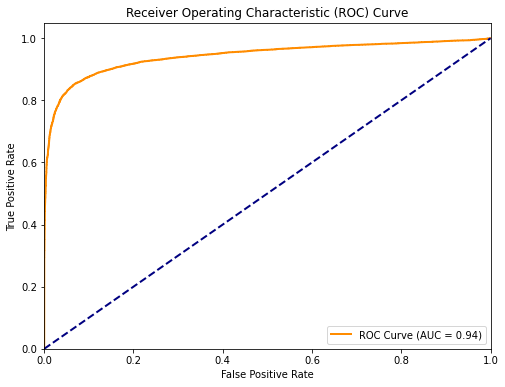

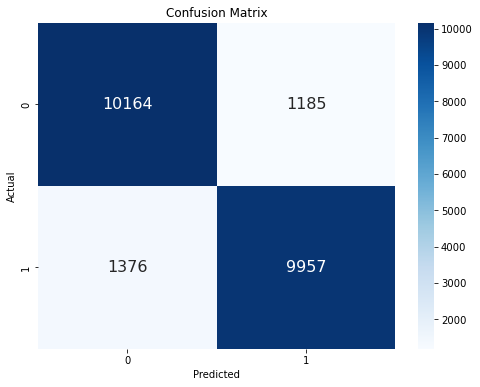

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Calculate ROC curve and AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
print(f'Average Precision: {average_precision:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model does not perform really good on the test set. However, the f1 score shows that the model is able to predict both the classes. In addittion, the accuracy is not really low, so we can say that the model is not overfitting.

### 4.1.2) Feautures importance evaluation

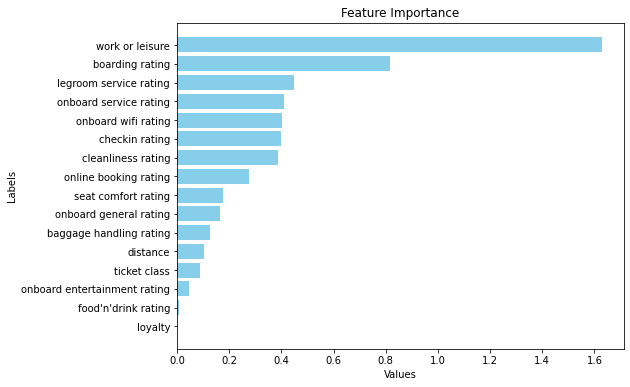

In [100]:
coefficients = np.abs(logistic_model.coef_[0])
feature_names = X.columns
coef_importance = list(zip(feature_names, coefficients))
coef_importance.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*coef_importance)
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Labels')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top feature at the top
plt.show()

Index(['Legroom Service Rating', 'Onboard General Rating',
       'Food'n'Drink Rating', 'Age', 'Departure Arrival Time Rating',
       'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating',
       'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Ticket Class',
       'Loyalty', 'Gender', 'Boarding Rating', 'Online Booking Rating',
       'Satisfied', 'Onboard Entertainment Rating', 'Distance',
       'Seat Comfort Rating', 'Work or Leisure', 'Departure Delay in Minutes',
       'Onboard Service Rating', 'Cleanliness Rating'],
      dtype='object')

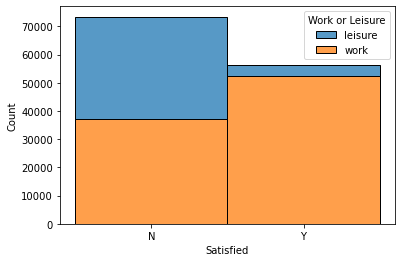

In [101]:
column_to_analyze = "Satisfied"

sns.histplot(data=df_trains, x=column_to_analyze, hue='Work or Leisure', multiple='stack')

df_trains.columns

For our model, the most important feature is 'Work or Leisure'. Surprisingly, if a customer booked a train for leisure, the most of the time he is not satisfied with the services provided. On the other hand, if a customer booked a train for work, he is more likely to be satisfied with the service, even though the ratio is quite balanced.

#### 4.1.3) Hyperparameters tuning

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Parameter distribution
param_distr_log_reg = {'C': uniform(0.1, 100), 'solver': ['lbfgs', 'liblinear']}

# Randomized search with cross-validation
random_log_reg = RandomizedSearchCV(LogisticRegression(), param_distr_log_reg, n_iter=10, cv=5, random_state=42, n_jobs=-1, return_train_score=True)
random_log_reg.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score = random_log_reg.cv_results_['mean_train_score'][random_log_reg.best_index_]
std_train_score = random_log_reg.cv_results_['std_train_score'][random_log_reg.best_index_]
mean_test_score = random_log_reg.cv_results_['mean_test_score'][random_log_reg.best_index_]
std_test_score = random_log_reg.cv_results_['std_test_score'][random_log_reg.best_index_]

# Print the results
print("Best parameters for Logistic Regression:", random_log_reg.best_params_)
print("Best training score for Logistic Regression:", mean_train_score)
print("Standard deviation in training score:", std_train_score)
print("Best cross-validation score for Logistic Regression:", mean_test_score)
print("Standard deviation in cross-validation score:", std_test_score)

Best parameters for Logistic Regression: {'C': 37.55401188473625, 'solver': 'lbfgs'}
Best training score for Logistic Regression: 0.8868068709548712
Standard deviation in training score: 0.0005058539626877273
Best cross-validation score for Logistic Regression: 0.8867039759843541
Standard deviation in cross-validation score: 0.0014007910969908906


### 4.2) Classification Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

### 4.2.1) Model evaluation

The following block contains a function that takes as input a classifier and returns the accuracy, precision, recall and f1 score of the model. We will use this function to evaluate the performance of the models.

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [104]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    34280.0  33763.0       1.0    68043.0       68043.0
_______________________________________________
Confusion Matrix: 
 [[34280     0]
 [    0 33763]]

Test Result:
Accuracy Score: 95.19%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.953978      0.949925  0.951944      0.951952      0.951953
recall         0.949775      0.954116  0.951944      0.951946      0.951944
f1-score       0.951872      0.952016  0.951944      0.951944      0.951944
support    11349.000000  11333.000000  0.951944  22682.000000  22

The improvements with respect to the logistic regression are really significant. The accuracy is higher and the f1 score is really high, meaning that the model is able to predict both the classes. In addittion, since we accuracy is 100.00% on the training set, considering the type of model we are using it is probably overfitting. We will deal with this problem in the next section, searching for the best hyperparameters.

### 4.2.2) Hyperparameters tuning

As a first step, we will search the best hyperparameters for the model. We will use the RandomizedSearchCV function, which is a technique to search the best hyperparameters for a model. It works by creating a grid of hyperparameters and then randomly selecting combinations to train the model and score on the validation set. This allows us to explicitly control the number of parameter combinations that are attempted. 

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


randomized_search_tree = DecisionTreeClassifier(random_state=42)
randomized_search_tree= RandomizedSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=2, cv=5, n_iter=10, random_state=42)

randomized_search_tree.fit(X_train, y_train)
best_params = randomized_search_tree.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=3, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=3, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=3, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=3, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=3, splitter=best; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.2s
[CV] END criterion